In [17]:
#Use the following commands to install the required packages
#%pip install numpy
#%pip install matplotlib
#%pip install pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
# Import the Data

data = pd.read_csv("Crop_recommendation.csv")

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
labels = data[['label']].value_counts()
print(labels)

label      
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
dtype: int64


In [ ]:
# making new columns of N, P, and K as ratios to each other (scaling this)
data['Ratio N'] = data['N']/ (data['N']+ data['P'] + data['K'])
data['Ratio P'] = data['P']/ (data['N']+ data['P'] + data['K'])
data['Ratio K'] = data['K']/ (data['N']+ data['P'] + data['K'])

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Ratio N,Ratio P,Ratio K
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.514286,0.240000,0.245714
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.461957,0.315217,0.222826
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.377358,0.345912,0.276730
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.496644,0.234899,0.268456
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.481481,0.259259,0.259259


In [ ]:
# One hot-encode the label
data_encode = pd.get_dummies(data, columns = ['label'])

data_encode.head()

,N,P,K,temperature,humidity,ph,rainfall,Ratio N,Ratio P,Ratio K,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0.514286,0.240000,0.245714,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0.461957,0.315217,0.222826,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0.377358,0.345912,0.276730,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0.496644,0.234899,0.268456,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0.481481,0.259259,0.259259,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
def get_data(label_name):
  new_data = data_encode[['N', 'K', 'P', 'temperature', 'humidity', 'ph', 'rainfall', 'Ratio N', 'Ratio P', 'Ratio K', label_name]]
  return new_data

In [ ]:
data_rice = get_data('label_rice')
data_rice.head(200)

,N,K,P,temperature,humidity,ph,rainfall,Ratio N,Ratio P,Ratio K,label_rice
0,90,43,42,20.879744,82.002744,6.502985,202.935536,0.514286,0.240000,0.245714,1
1,85,41,58,21.770462,80.319644,7.038096,226.655537,0.461957,0.315217,0.222826,1
2,60,44,55,23.004459,82.320763,7.840207,263.964248,0.377358,0.345912,0.276730,1
3,74,40,35,26.491096,80.158363,6.980401,242.864034,0.496644,0.234899,0.268456,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0.481481,0.259259,0.259259,1
...,...,...,...,...,...,...,...,...,...,...,...
195,90,24,57,18.928519,72.800861,6.158860,82.341629,0.526316,0.333333,0.140351,0
196,67,22,35,23.305468,63.246480,6.385684,108.760300,0.540323,0.282258,0.177419,0
197,60,19,54,18.748267,62.498785,6.417820,70.234016,0.451128,0.406015,0.142857,0
198,83,23,58,19.742133,59.662631,6.381202,65.508614,0.506098,0.353659,0.140244,0


In [ ]:
data_rice.loc[1705]

N               70.000000
K               45.000000
P               68.000000
temperature     33.835086
humidity        92.854702
ph               6.991626
rainfall       203.404403
Ratio N          0.382514
Ratio P          0.371585
Ratio K          0.245902
label_rice       0.000000
Name: 1705, dtype: float64

In [ ]:
data_rice = data_rice.sample(frac= 1)
data_rice.head(200)

,N,K,P,temperature,humidity,ph,rainfall,Ratio N,Ratio P,Ratio K,label_rice
1953,107,21,36,25.292501,75.666533,6.205264,62.641742,0.652439,0.219512,0.128049,0
1225,24,205,140,12.087022,83.593987,5.932029,68.668134,0.065041,0.379404,0.555556,0
1512,13,204,126,23.109427,92.796308,6.383180,108.183792,0.037901,0.367347,0.594752,0
339,7,23,79,19.636535,19.687511,5.821650,96.658889,0.064220,0.724771,0.211009,0
385,32,19,68,24.628350,18.183252,5.514234,149.744103,0.268908,0.571429,0.159664,0
...,...,...,...,...,...,...,...,...,...,...,...
862,22,18,60,19.592210,61.286334,6.743980,41.770489,0.220000,0.600000,0.180000,0
1553,28,200,136,23.062044,92.395441,6.245859,114.739910,0.076923,0.373626,0.549451,0
1800,18,29,30,26.762749,92.860569,6.420019,224.590366,0.233766,0.389610,0.376623,0
265,29,75,75,19.624163,18.714832,7.064790,88.458569,0.162011,0.418994,0.418994,0


<Axes: >

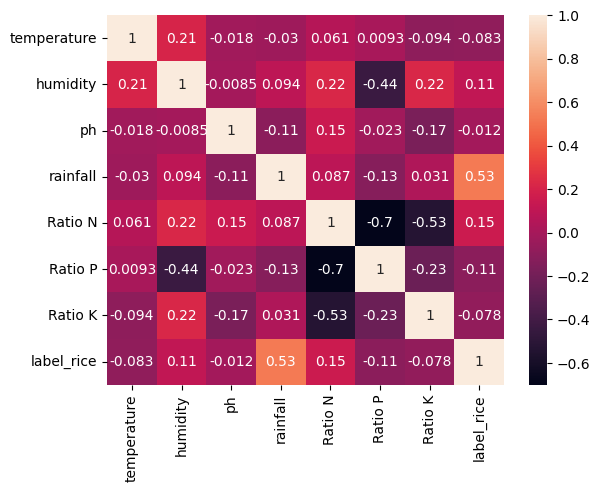

In [ ]:
import seaborn as sns
data_rice = data_rice.drop(['N', 'P', 'K'], axis = 1)
corr_matrix = data_rice.corr()
sns.heatmap(corr_matrix, annot= True)

In [ ]:
data_rice.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
Ratio N        0
Ratio P        0
Ratio K        0
label_rice     0
dtype: int64

In [ ]:
data_rice.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
Ratio N        float64
Ratio P        float64
Ratio K        float64
label_rice       uint8
dtype: object

In [ ]:
data_rice.describe()

,temperature,humidity,ph,rainfall,Ratio N,Ratio P,Ratio K,label_rice
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,6.469480,103.463655,0.340174,0.368562,0.291264,0.045455
std,5.063749,22.263812,0.773938,54.958389,0.196864,0.171094,0.144400,0.208346
min,8.825675,14.258040,3.504752,20.211267,0.000000,0.027933,0.075000,0.000000
25%,22.769375,60.261953,5.971693,64.551686,0.178947,0.254058,0.184372,0.000000
50%,25.598693,80.473146,6.425045,94.867624,0.329599,0.356432,0.250000,0.000000
75%,28.561654,89.948771,6.923643,124.267508,0.506192,0.486839,0.368903,0.000000
max,43.675493,99.981876,9.935091,298.560117,0.735450,0.822917,0.878049,1.000000


In [ ]:
#Import Modules for Machine Learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


y = data_rice[['label_rice']]
x = data_rice.drop(['label_rice'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 42)




In [ ]:
x_train.shape, y_train.shape

((1650, 7), (1650, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
logreg.score(x_test, y_test)

0.9763636363636363

In [ ]:
# Analyzing the models

y_pred = logreg.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<Axes: >

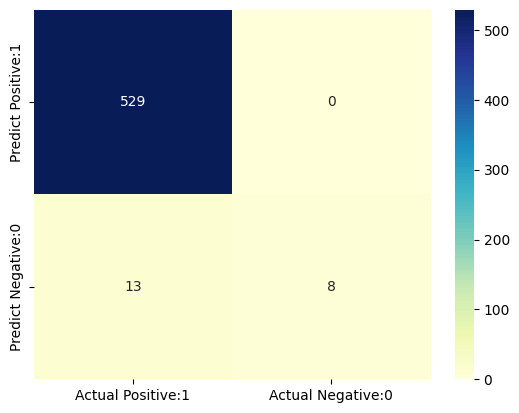

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       529
           1       1.00      0.38      0.55        21

    accuracy                           0.98       550
   macro avg       0.99      0.69      0.77       550
weighted avg       0.98      0.98      0.97       550



#### Precision
The percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. The ratio of true positives to the sum of true and false positives.

#### Recall
The percentage of correctly predicted positive outcomes out of all the actual positive outcomes. Can be given as the ratio of true positives to the sum of true positives and false negativies. Recall is also called sensitivity. TP/ (TP + FN)

#### f1-score
The weighted harmonic mean of precision and recall. The best score would be 1.0 and the 0.0. Always lower than accuracy measures.

#### Support
The actual number of occurances of the class in our dataset

# **Testing Other Models**

In [ ]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 1)

model_dtree.fit(x_train, y_train)

print('Training set score:', model_dtree.score(x_train, y_train))

print('Test set score:', model_dtree.score(x_test, y_test))

Training set score: 0.9848484848484849
Test set score: 0.9854545454545455


<Axes: >

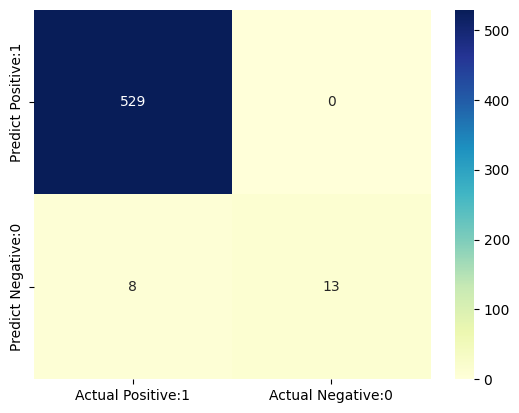

In [ ]:
y_pred_test_dtree = model_dtree.predict(x_test)

cm2 = confusion_matrix(y_test, y_pred_test_dtree)

cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=0)

model_rf.fit(x_train, y_train)

print('Training set score:', model_rf.score(x_train, y_train))

print('Test set score:', model_rf.score(x_test, y_test))

<ipython-input-25-fd975c7348ef>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


Training set score: 1.0
Test set score: 0.9945454545454545


<Axes: >

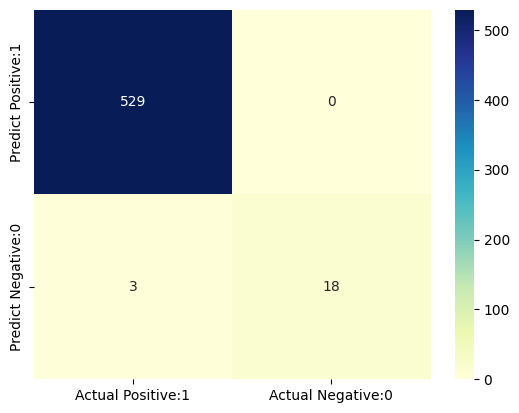

In [ ]:
y_pred_test_rf = model_rf.predict(x_test)

cm2 = confusion_matrix(y_test, y_pred_test_rf)

cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Creating a Function For the Machine Learning Algorithms**

In [ ]:
# x can be 'Logistic Regression', 'Random Forest', or 'Decision Tree'
def machine_learning(x):
  if x == 'Logistic Regression':
    model = LogisticRegression(solver='liblinear', random_state= 42)
  elif x == 'Random Forest':
    model = RandomForestClassifier(random_state=0)
  else:
    model = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 1)
  return model

In [ ]:
model = machine_learning('Logistic Regression')


In [ ]:
#Predicting which one will be a yes

data_encode_dropped = data_encode.drop(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Ratio N', 'Ratio P', 'Ratio K'], axis = 1).head(5)

data_encode.head()

,N,P,K,temperature,humidity,ph,rainfall,Ratio N,Ratio P,Ratio K,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0.514286,0.240000,0.245714,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0.461957,0.315217,0.222826,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0.377358,0.345912,0.276730,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0.496644,0.234899,0.268456,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0.481481,0.259259,0.259259,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
encoded_labels = data_encode_dropped.columns
encoded_labels

Index(['label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
       'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon',
       'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate',
       'label_rice', 'label_watermelon'],
      dtype='object')

In [ ]:
def running_a_model_for_a_crop(label_crop):
  y = data_encode[label_crop]
  x = data_encode[['temperature', 'humidity', 'ph', 'rainfall', 'Ratio N', 'Ratio P', 'Ratio K']]

  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 42)

  scaler = MinMaxScaler()

  x_train = scaler.fit_transform(x_train)

  x_test = scaler.transform(x_test)

  return x_train, x_test, y_train, y_test





In [ ]:
x_train, x_test, y_train, y_test = running_a_model_for_a_crop('label_cotton')

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1650, 7), (550, 7), (1650,), (550,))

In [ ]:
model.fit(x_train, y_train)

model.score(x_test, y_test)


0.9654545454545455

In [ ]:
x_test

array([[0.59306878, 0.93872187, 0.41682113, ..., 0.8323087 , 0.094464  ,
        0.26131474],
       [0.49795587, 0.84296447, 0.42837304, ..., 0.84873757, 0.02895965,
        0.3111153 ],
       [0.99096186, 0.92264534, 0.5344578 , ..., 0.47190013, 0.42362242,
        0.26553218],
       ...,
       [0.34113719, 0.01172532, 0.55969772, ..., 0.2304597 , 0.42679954,
        0.48350343],
       [0.45242078, 0.49230787, 0.58837645, ..., 0.86611806, 0.18887083,
        0.13689269],
       [0.52109732, 0.87252157, 0.61085678, ..., 0.59077152, 0.3725925 ,
        0.20718456]])

In [ ]:
encoded_labels

Index(['label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
       'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon',
       'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate',
       'label_rice', 'label_watermelon'],
      dtype='object')

In [ ]:
#Finding which crop you can grow

def what_can_you_grow(x_data, model_choice):
  values = np.array([])
  scores = np.array([])
  for i in encoded_labels:
    x_train, x_test, y_train, y_test = running_a_model_for_a_crop(i)
    model_choice.fit(x_train, y_train)
    score = model_choice.score(x_test, y_test)
    scores = np.append(scores, score)
    pred = model_choice.predict(x_data)
    values = np.append(values, pred)
  return values, scores




In [ ]:
# Making x data

ratio_n = 11/(0.0004+11+3.25)
ratio_p = 0.0004/(0.0004+11+3.25)
ratio_k = 3.25/(0.0004+11+3.25)

x_data = np.array([[19.74, 47.15, 8.6, 132.48, ratio_n, ratio_p, ratio_k]])



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)

x_data = scaler.transform(x_data)

x_data

array([[1.97400000e+01, 4.71500000e+01, 8.60000000e+00, 1.32480000e+02,
        7.71908157e-01, 2.80693875e-05, 2.28063774e-01]])

In [ ]:
values, scores = what_can_you_grow(x_data, machine_learning('Random Forest'))

In [ ]:
values

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [ ]:
# Make a dataset of values

crops_we_can_grow = pd.DataFrame()

crops_we_can_grow['Crop'] = encoded_labels
crops_we_can_grow['Can Grow'] = values
crops_we_can_grow['Accuracy Score'] = scores

crops_we_can_grow.head()

,Crop,Can Grow,Accuracy Score
0,label_apple,0.0,0.998182
1,label_banana,0.0,1.000000
2,label_blackgram,0.0,0.992727
3,label_chickpea,0.0,1.000000
4,label_coconut,1.0,1.000000


<BarContainer object of 22 artists>

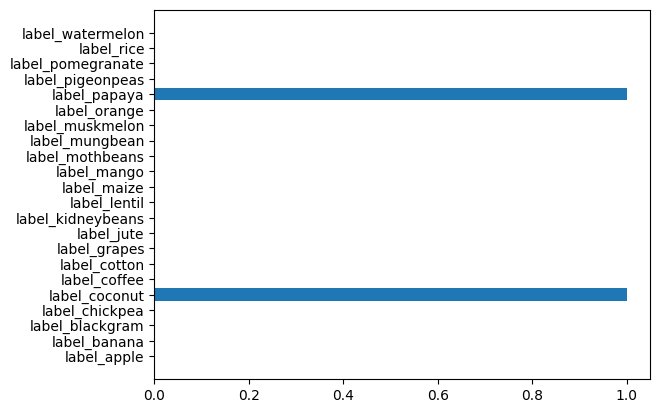

In [ ]:
plt.barh(crops_we_can_grow['Crop'], crops_we_can_grow['Can Grow'])